In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
 %tensorflow_version 1.x

In [2]:
import numpy as np
import scipy
import scipy.sparse as sparse
from scipy.sparse import linalg
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import rmsprop, SGD, Adagrad, Adadelta



def swish(x):
   beta = 1.0 #1, 1.5 or 2
   return beta * x * keras.backend.sigmoid(x)

Using TensorFlow backend.


In [3]:
#full_input=np.genfromtxt('/content/gdrive/My Drive/colab_notebooks/training_input_128_500K.csv',delimiter=',').transpose()
#full_output=np.genfromtxt('/content/gdrive/My Drive/colab_notebooks/training_output_128_500K.csv',delimiter=',').transpose()

full_input=np.genfromtxt('/content/gdrive/My Drive/Colab Notebooks/input_couette.csv',delimiter=',').transpose()
full_output=np.genfromtxt('/content/gdrive/My Drive/Colab Notebooks/output_couette.csv',delimiter=',').transpose()



training_input1=full_input[0:100000,:]
training_output1=full_output[0:100000,:]


training_input2=full_input[100000:250000,:]
training_output2=full_output[100000:250000,:]

training_input=[]
training_output=[]

training_input=np.append(training_input1,training_input2,axis=0)
training_output=np.append(training_output1,training_output2,axis=0)

print('shape of input')
print(np.shape(training_input))


print('shape of output')
print(np.shape(training_output))


train_size=np.size(training_input,0)-10000
index=np.random.permutation(np.size(training_input,0))



std_input=np.std(full_input)
std_output=np.std(full_output)

mean_input=np.mean(full_input)
mean_output=np.mean(full_output)

print(std_input)
print(std_output)

print(mean_input)
print(mean_output)

norm_input=(training_input-mean_input)/std_input
norm_output=(training_output-mean_output)/std_output

input_train=norm_input[index[0:train_size],:]
output_train=norm_output[index[0:train_size],:]

test_input=norm_input[index[train_size:],:]
test_output=norm_output[index[train_size:],:]

model = Sequential()

model.add(Dense(97,input_dim=97,bias_initializer='zeros',activation='linear'))
model.add(Dense(250,activation='linear'))
model.add(Dense(250,activation='linear'))
model.add(Dense(250,activation='linear'))
model.add(Dense(250,activation='linear'))
model.add(Dense(250,activation='linear'))
model.add(Dense(250,activation='linear'))
model.add(Dense(97,activation=None))

model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
model.fit(input_train, output_train,nb_epoch=50,batch_size=100,shuffle=True,validation_split=0.2)

shape of input
(250000, 97)
shape of output
(250000, 97)
0.2493310486144027
0.002224743551411029
0.49991262494546335
3.638445116234319e-07


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 192000 samples, validate on 48000 samples
Epoch 1/50
192000/192000 [==============================] - 10s 51us/step - loss: 0.0336 - mae: 0.1336 - val_loss: 0.0290 - val_mae: 0.1280
Epoch 2/50
192000/192000 [==============================] - 8s 42us/step - loss: 0.0284 - mae: 0.1252 - val_loss: 0.0304 - val_mae: 0.1300
Epoch 3/50
192000/192000 [==============================] - 9s 44us/step - loss: 0.0279 - mae: 0.1242 - val_loss: 0.0278 - val_mae: 0.1245
Epoch 4/50
192000/192000 [==============================] - 8s 42us/step - loss: 0.0278 - mae: 0.1239 - val_loss: 0.0273 - val_mae: 0.1229
Epoch 5/50
 51600/192000 [=======>......................] - ETA: 5s - loss: 1.4563 - mae: 0.3177

KeyboardInterrupt: ignored

In [0]:
np.savetxt('prediction_couette.csv',prediction,delimiter=',')
np.savetxt('truth_couette.csv',test_output,delimiter=',')

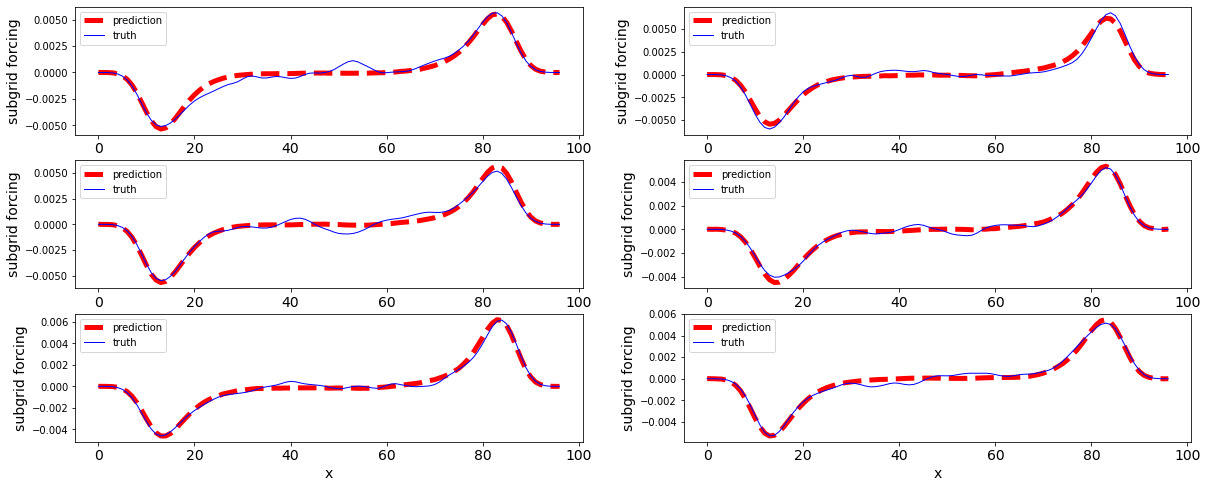

In [18]:
## for couette flow

prediction=model.predict(test_input)

plt.figure(figsize=(20, 8))

plt.subplot(3,2,1)
plt.plot(prediction[0,:]*std_output+mean_output,'r-',linewidth=5,label='prediction',linestyle='dashed')
plt.plot(test_output[0,:]*std_output+mean_output,'b',linewidth=1,label='truth')
plt.xlabel('x',fontsize=14)
plt.ylabel('subgrid forcing',fontsize=14)
plt.xticks(fontsize=14)
plt.legend()

plt.subplot(3,2,2)
plt.plot(prediction[10,:]*std_output+mean_output,'r-',linewidth=5,label='prediction',linestyle='dashed')
plt.plot(test_output[10,:]*std_output+mean_output,'b',linewidth=1,label='truth')
plt.xlabel('x',fontsize=14)
plt.ylabel('subgrid forcing',fontsize=14)
plt.xticks(fontsize=14)
plt.legend()

plt.subplot(3,2,3)
plt.plot(prediction[80,:]*std_output+mean_output,'r-',linewidth=5,label='prediction',linestyle='dashed')
plt.plot(test_output[80,:]*std_output+mean_output,'b',linewidth=1,label='truth')
plt.xlabel('x',fontsize=14)
plt.ylabel('subgrid forcing',fontsize=14)
plt.xticks(fontsize=14)
plt.legend()

plt.subplot(3,2,4)
plt.plot(prediction[170,:]*std_output+mean_output,'r-',linewidth=5,label='prediction',linestyle='dashed')
plt.plot(test_output[170,:]*std_output+mean_output,'b',linewidth=1,label='truth')
plt.xlabel('x',fontsize=14)
plt.ylabel('subgrid forcing',fontsize=14)
plt.xticks(fontsize=14)
plt.legend()

plt.subplot(3,2,5)
plt.plot(prediction[200,:]*std_output+mean_output,'r-',linewidth=5,label='prediction',linestyle='dashed')
plt.plot(test_output[200,:]*std_output+mean_output,'b',linewidth=1,label='truth')
plt.xlabel('x',fontsize=14)
plt.ylabel('subgrid forcing',fontsize=14)
plt.xticks(fontsize=14)
plt.legend()

plt.subplot(3,2,6)
plt.plot(prediction[1200,:]*std_output+mean_output,'r-',linewidth=5,label='prediction',linestyle='dashed')
plt.plot(test_output[1200,:]*std_output+mean_output,'b',linewidth=1,label='truth')
plt.xlabel('x',fontsize=14)
plt.ylabel('subgrid forcing',fontsize=14)
plt.xticks(fontsize=14)
plt.legend()



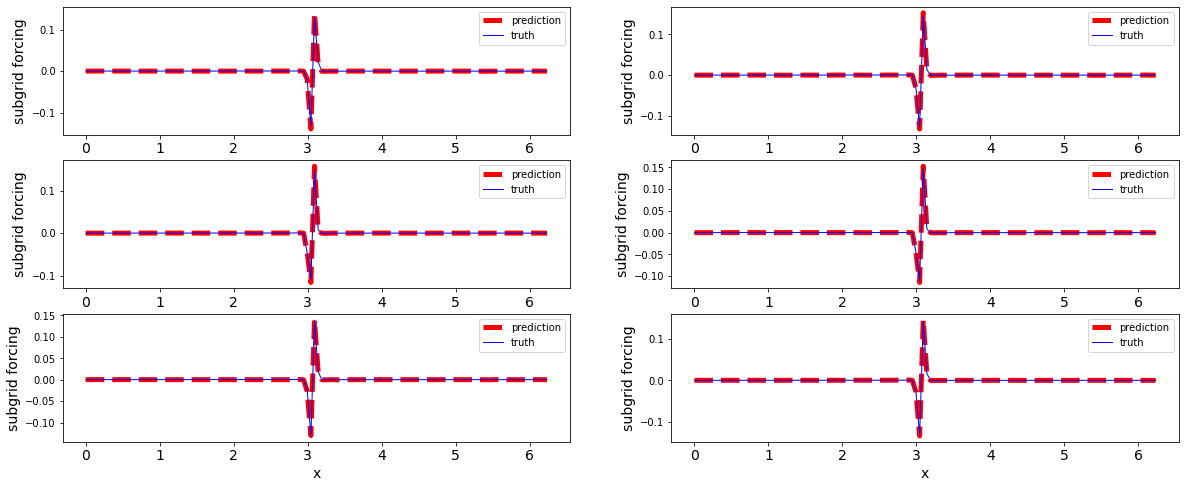

In [0]:
prediction=model.predict(test_input)
NX=128
Lx = np.float64(2*math.pi)
dx = np.float64(Lx/NX)
x =  np.float64(np.linspace(0, Lx-dx, num=NX))
plt.figure(figsize=(20, 8))

plt.subplot(3,2,1)
plt.plot(x, prediction[0,:]*std_output+mean_output,'r-',linewidth=5,label='prediction',linestyle='dashed')
plt.plot(x, test_output[0,:]*std_output+mean_output,'b',linewidth=1,label='truth')
plt.xlabel('x',fontsize=14)
plt.ylabel('subgrid forcing',fontsize=14)
plt.xticks(fontsize=14)
plt.legend()

plt.subplot(3,2,2)
plt.plot(x,prediction[10,:]*std_output+mean_output,'r-',linewidth=5,label='prediction',linestyle='dashed')
plt.plot(x,test_output[10,:]*std_output+mean_output,'b',linewidth=1,label='truth')
plt.xlabel('x',fontsize=14)
plt.ylabel('subgrid forcing',fontsize=14)
plt.xticks(fontsize=14)
plt.legend()

plt.subplot(3,2,3)
plt.plot(x,prediction[80,:]*std_output+mean_output,'r-',linewidth=5,label='prediction',linestyle='dashed')
plt.plot(x,test_output[80,:]*std_output+mean_output,'b',linewidth=1,label='truth')
plt.xlabel('x',fontsize=14)
plt.ylabel('subgrid forcing',fontsize=14)
plt.xticks(fontsize=14)
plt.legend()

plt.subplot(3,2,4)
plt.plot(x,prediction[170,:]*std_output+mean_output,'r-',linewidth=5,label='prediction',linestyle='dashed')
plt.plot(x,test_output[170,:]*std_output+mean_output,'b',linewidth=1,label='truth')
plt.xlabel('x',fontsize=14)
plt.ylabel('subgrid forcing',fontsize=14)
plt.xticks(fontsize=14)
plt.legend()

plt.subplot(3,2,5)
plt.plot(x,prediction[200,:]*std_output+mean_output,'r-',linewidth=5,label='prediction',linestyle='dashed')
plt.plot(x,test_output[200,:]*std_output+mean_output,'b',linewidth=1,label='truth')
plt.xlabel('x',fontsize=14)
plt.ylabel('subgrid forcing',fontsize=14)
plt.xticks(fontsize=14)
plt.legend()

plt.subplot(3,2,6)
plt.plot(x,prediction[1200,:]*std_output+mean_output,'r-',linewidth=5,label='prediction',linestyle='dashed')
plt.plot(x,test_output[1200,:]*std_output+mean_output,'b',linewidth=1,label='truth')
plt.xlabel('x',fontsize=14)
plt.ylabel('subgrid forcing',fontsize=14)
plt.xticks(fontsize=14)
plt.legend()


In [0]:
weights = [layer.get_weights() for layer in model.layers]



In [0]:
LRF=np.linalg.multi_dot([weights[0][0],weights[1][0],weights[2][0],weights[3][0],weights[4][0],weights[5][0],weights[6][0],weights[7][0]])

In [0]:
np.savetxt('E_couette.csv', LRF, delimiter=',')

In [0]:
[Lambda,vector]=np.linalg.eig(LRF)

Text(0, 0.5, '$Im(\\lambda)$')

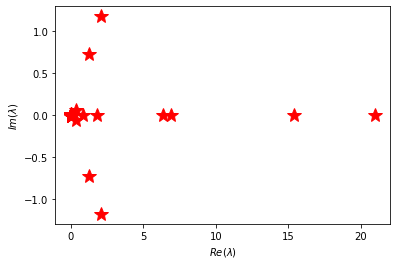

In [22]:
plt.plot(np.real(Lambda),np.imag(Lambda),'r*', markersize=14)
plt.xlabel('$Re(\lambda)$')
plt.ylabel('$Im(\lambda)$')

In [0]:
np.savetxt('eigenvalues2.csv',Lambda,delimiter=',')

In [0]:
Lambda1=np.genfromtxt('eigenvalues1.csv',dtype='complex',delimiter=',')
Lambda2=np.genfromtxt('/content/eigenvalues2.csv',dtype='complex',delimiter=',')

Text(0, 0.5, '$Im(\\lambda)$')

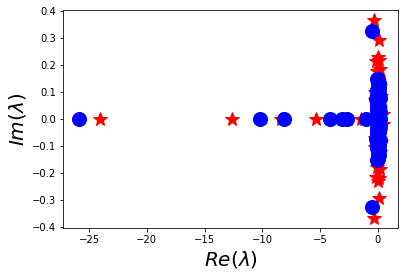

In [0]:
plt.plot(np.real(Lambda1),np.imag(Lambda1),'r*',markersize=14)
plt.plot(np.real(Lambda2),np.imag(Lambda2),'bo',markersize=14)

plt.xlabel('$Re(\lambda)$',fontsize=20)
plt.ylabel('$Im(\lambda)$',fontsize=20)

In [0]:
idx = Lambda.argsort()[::-1]   
eigenvector=vector[:,idx]

In [0]:
np.savetxt('eigenvector1.csv',eigenvector,delimiter=',')

In [0]:
vec1=np.genfromtxt('eigenvector1.csv',dtype='complex',delimiter=',')
vec2=np.genfromtxt('/content/eigenvector1.csv',dtype='complex',delimiter=',')



Text(0.5, 0, 'x')

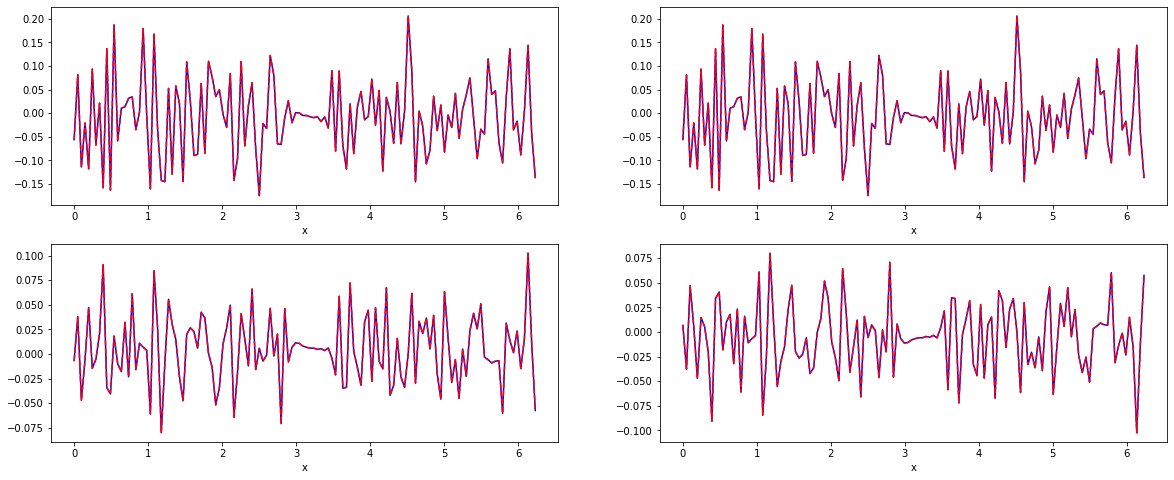

In [0]:
plt.figure(figsize=(20, 8))
plt.subplot(2,2,1)
plt.plot(x,np.real(vec1[:,0]),'b')
plt.plot(x,np.real(vec2[:,0]),'--r',markersize=20)
plt.xlabel('x')

plt.subplot(2,2,2)
plt.plot(x,np.real(vec1[:,1]),'b')
plt.plot(x,np.real(vec2[:,1]),'--r',markersize=20)
plt.xlabel('x')


plt.subplot(2,2,3)
plt.plot(x,np.imag(vec1[:,0]),'b')
plt.plot(x,np.imag(vec2[:,0]),'--r',markersize=20)
plt.xlabel('x')


plt.subplot(2,2,4)
plt.plot(x,np.imag(vec1[:,1]),'b')
plt.plot(x,np.imag(vec2[:,1]),'--r',markersize=20)
plt.xlabel('x')

